<tifffile.TiffPages @8> invalid page offset 20840448


(2866, 2944)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
<tifffile.TiffPages @8> invalid page offset 20840448
<tifffile.TiffPages @8> invalid page offset 18939904


16594.54201297351
0.00261262472595728
(5731, 5887)
Координаты центра
Количество
197239

(500, 500, 3)


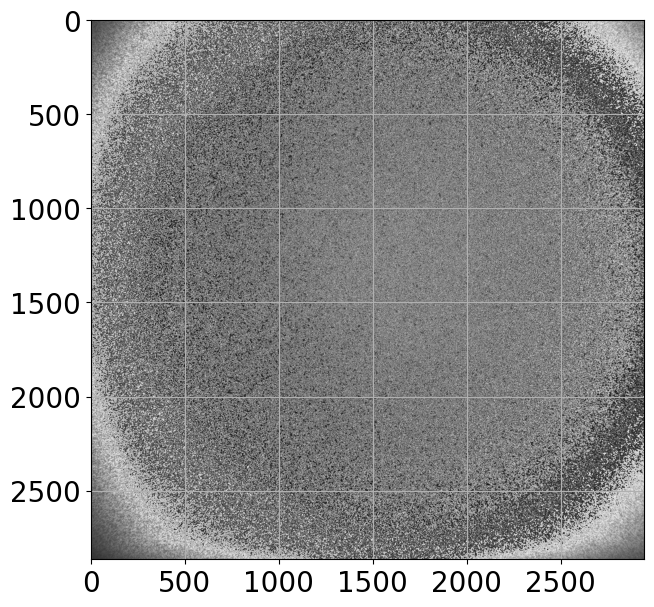

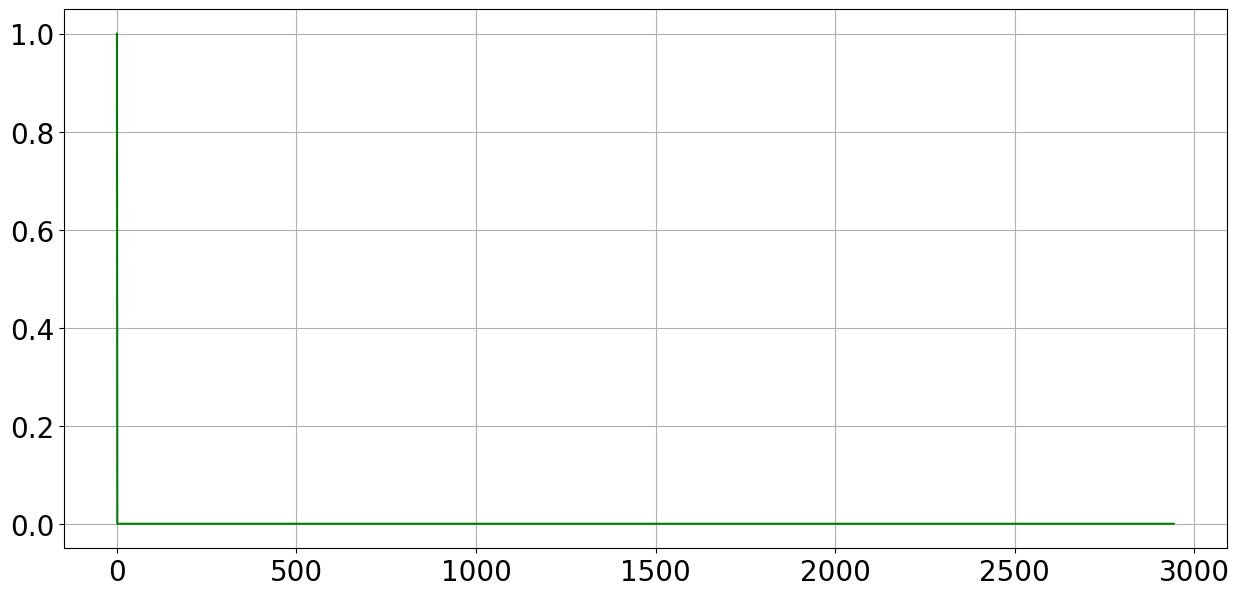

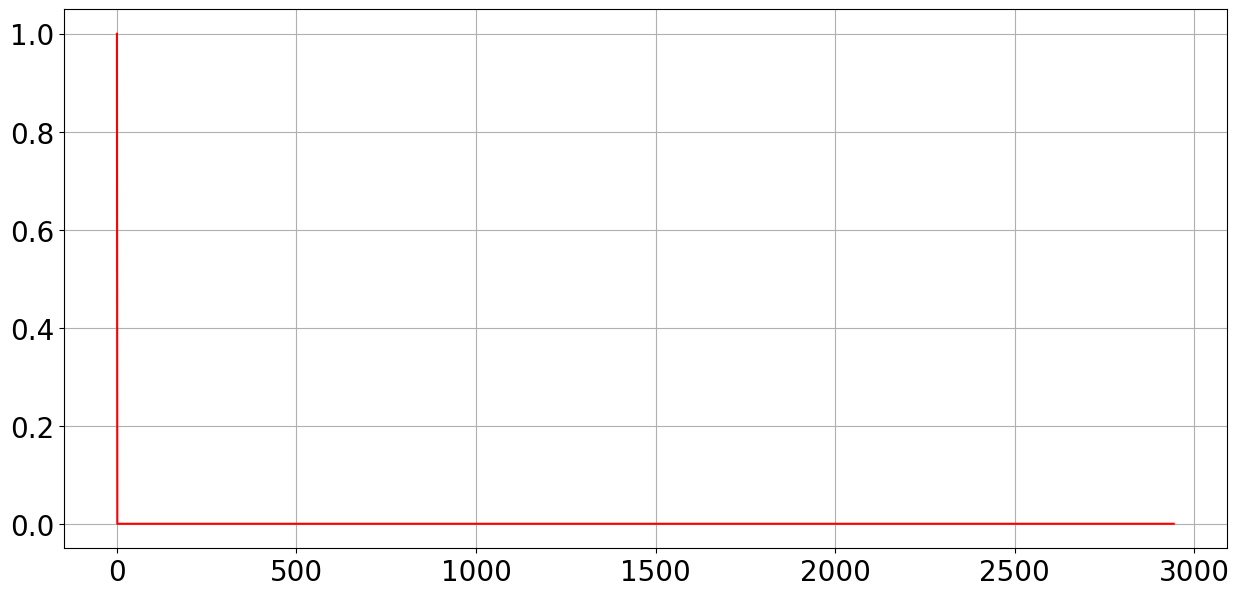

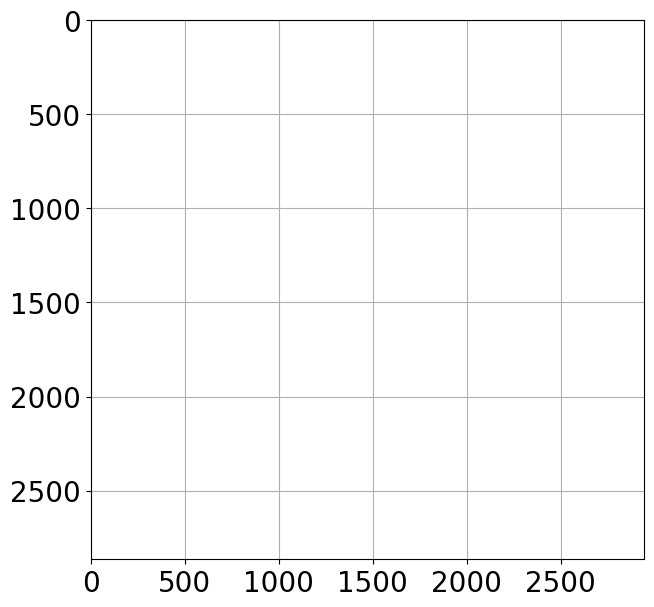

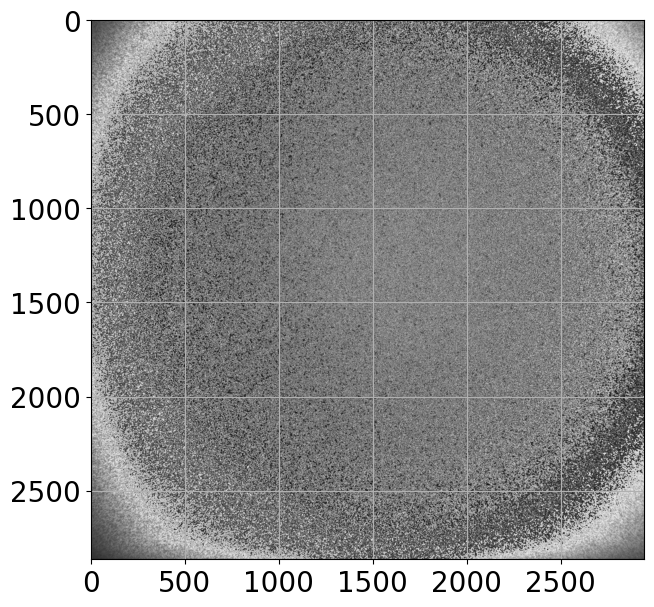

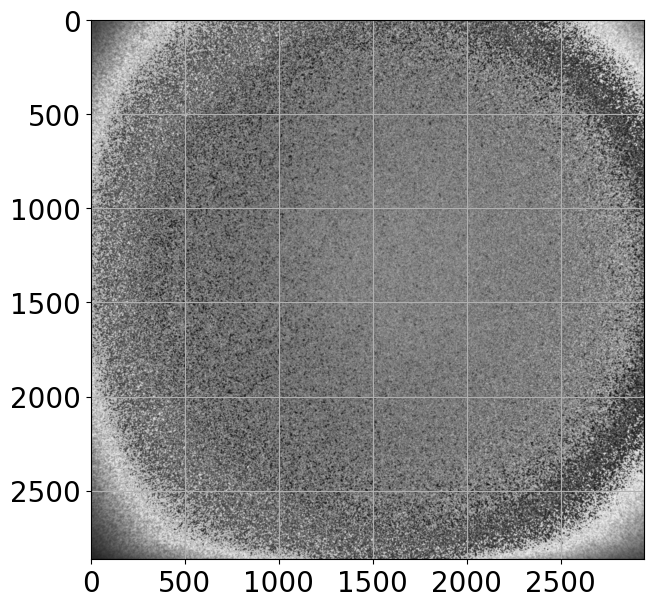

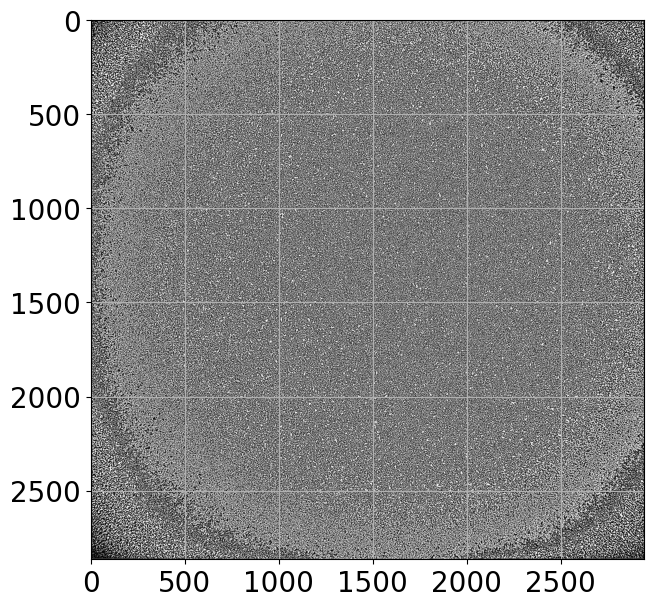

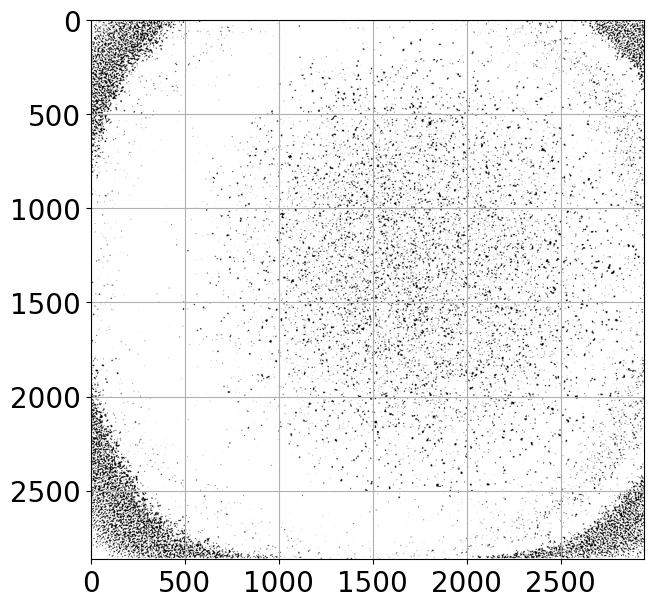

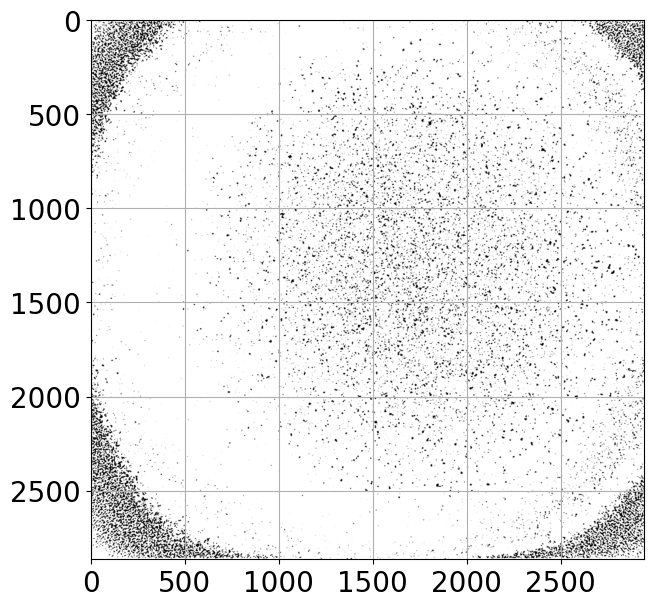

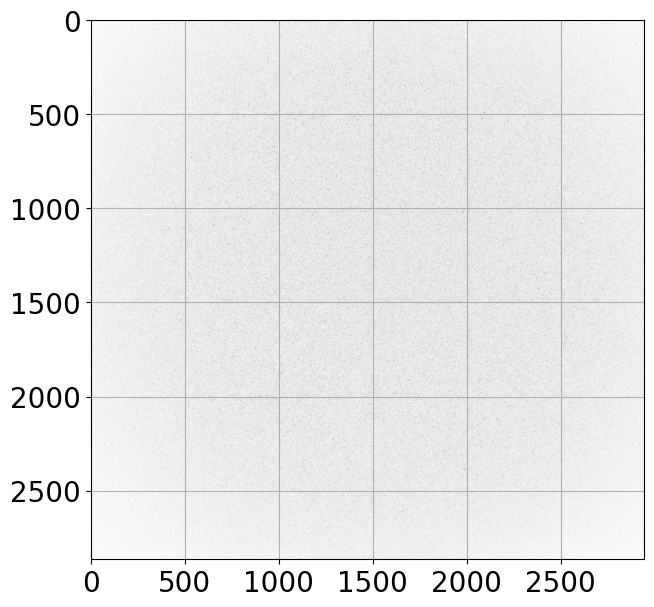

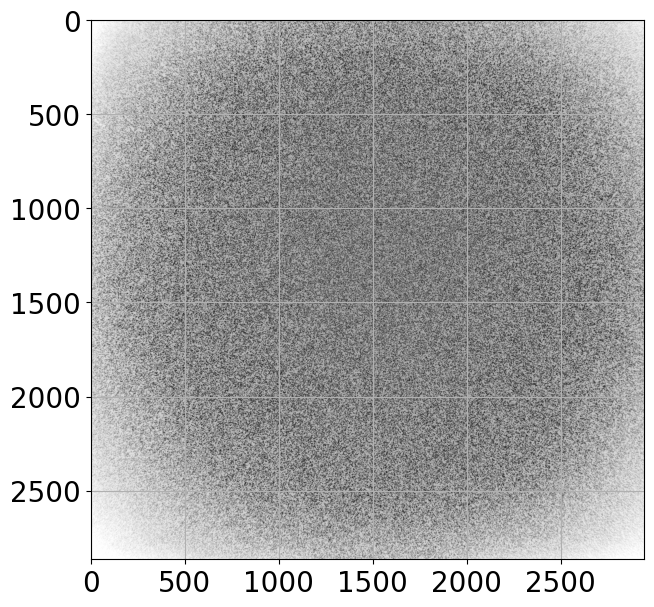

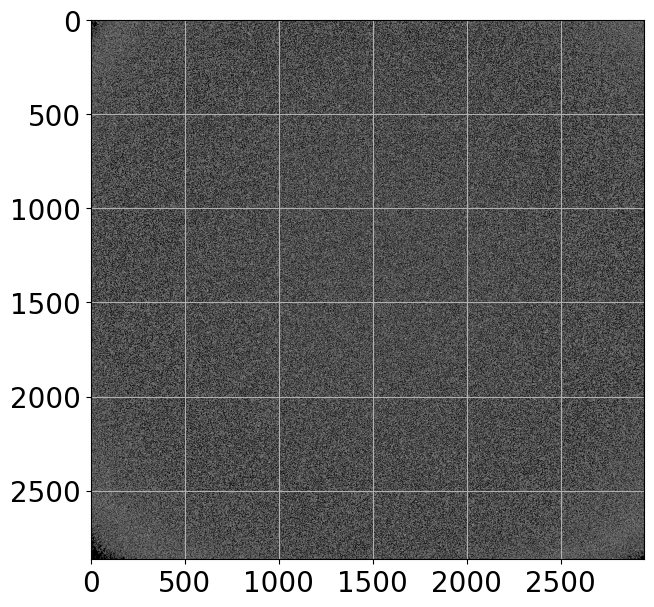

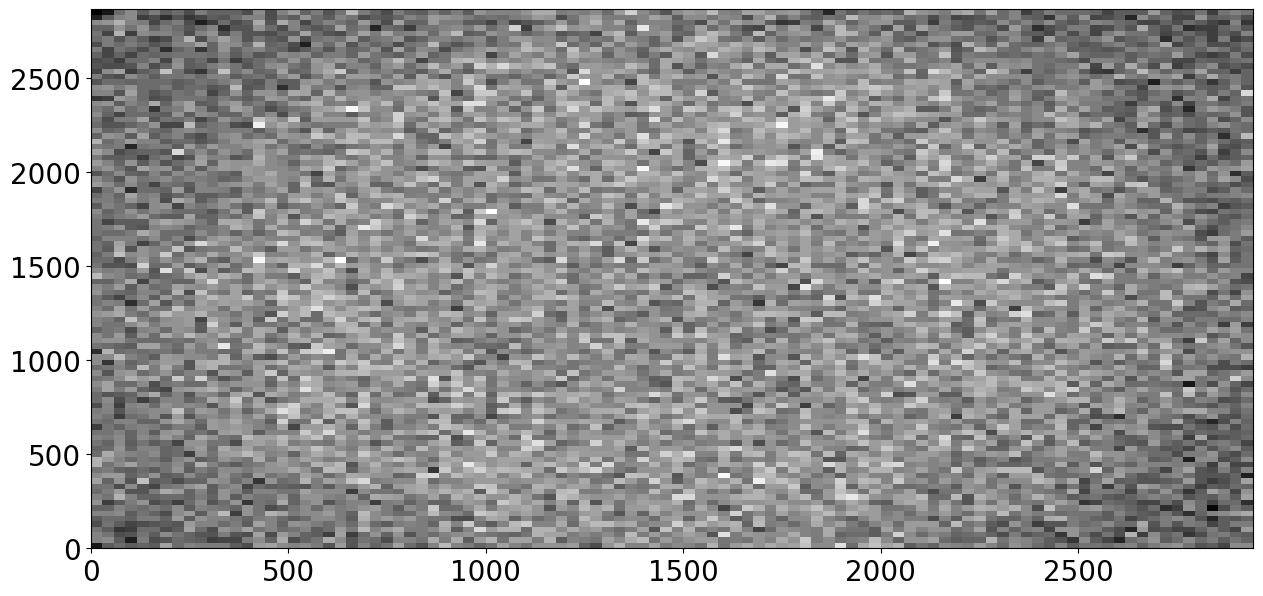

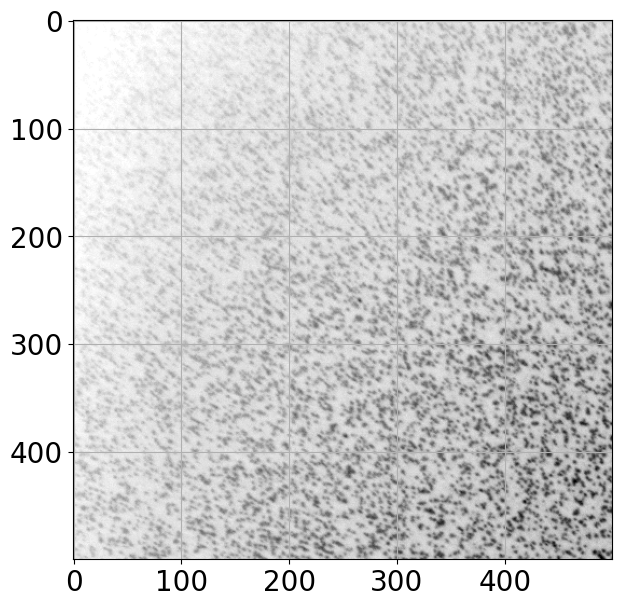

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#from libtiff import TIFF
from skimage import io
#import pytiff
from tifffile import tifffile
#import OpenImageIO as oiio
#import rasterio
#import tensorflow_io as tfio
import cv2
import scipy
from skimage import color, data, restoration
from scipy.signal import convolve2d
import sporco
import skimage 
from scipy import ndimage
from skimage import measure
import matlab
import matlab.engine 
from wolframclient.evaluation import WolframLanguageSession
from wolframclient.language import wl
#import htmlPy
import eel
from skimage.metrics import structural_similarity
from skimage.metrics import mean_squared_error
from skimage import filters
from skimage.filters import try_all_threshold
from skimage import morphology
import pandas as pd
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle
from skimage.io import imread



def generate_feature_stack(image):
    # determine features
    blurred = filters.gaussian(image, sigma=2)
    edges = filters.sobel(blurred)

    # collect features in a stack
    # The ravel() function turns a nD image into a 1-D image.
    # We need to use it because scikit-learn expects values in a 1-D format here. 
    feature_stack = [
        image.ravel(),
        blurred.ravel(),
        edges.ravel()
    ]
    
    # return stack as numpy-array
    return np.asarray(feature_stack)

def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)


def gamma_trans(img,gamma):
    # Конкретный метод сначала нормализуется до 1, а затем гамма используется в качестве значения индекса, чтобы найти новое значение пикселя, а затем восстановить
    gamma_table = [np.power(x/255.0,gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    # Реализация сопоставления использует функцию поиска в таблице Opencv
    return cv2.LUT(img0,gamma_table)


def laplacian_of_gaussian(image, sigma):
    """
    Applies a Gaussian kernel to an image and the Laplacian afterwards.
    """
    
    # blur the image using a Gaussian kernel
    intermediate_result = filters.gaussian(image, sigma)
    
    # apply the mexican hat filter (Laplacian)
    result = filters.laplace(intermediate_result)
    
    return result


def main():
    #image = cv2.imread("C:/Users/evgen/Downloads/s_1_1102_c.jpg",0)
    image=imread("C:/Users/Евгений/Downloads/s_1_1102_c.tif")
    image = cv2.imread("C:/Users/evgen/Downloads/s_1_1102_c.jpg",0)
    image=np.asarray(image,dtype=np.uint8)
    #image=scipy.signal.wiener(image)
    print(image.shape)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray',vmax=image.max(),vmin=image.min())
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    image= cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    hsl=cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    hist = cv2.calcHist([hsl], [0], None, [hsl.shape[1]], [0, hsl.shape[1]])
    hist=hist/hist.sum()
    plt.figure(figsize=(15,7))
    
    plt.plot(hist.flatten(),'g')
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений

    hsv=cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    
    hist = cv2.calcHist([hsv], [0], None, [hsv.shape[1]], [0, hsv.shape[1]])
    hist=hist/hist.sum()
    plt.figure(figsize=(15,7))
    
    plt.plot(hist.flatten(),'r')
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    image=scipy.signal.wiener(image,noise=image.std())
    
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray',vmax=image.max(),vmin=image.min())
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    image=np.asarray(image,dtype=np.uint8)
    image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    plt.figure(figsize=(15,7))
    plt.imshow(image,cmap='gray')
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    slp,hlp=sporco.signal.tikhonov_filter(image,2)
    plt.figure(figsize=(15,7))
    
    plt.imshow(slp,cmap = 'gray',vmax=slp.max(),vmin=slp.min())
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    plt.figure(figsize=(15,7))
    
    plt.imshow(hlp,cmap = 'gray',vmax=hlp.max(),vmin=hlp.min())
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    hlp=ndimage.median_filter(hlp, size=7)
    hlp=hlp<np.percentile(hlp, 95)

    plt.figure(figsize=(15,7))
    
    plt.imshow(hlp,cmap = 'gray',vmax=hlp.max(),vmin=hlp.min())
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делени
    
    hlp = filters.gaussian(hlp, sigma=1)
    plt.figure(figsize=(15,7))
    
    plt.imshow(hlp,cmap = 'gray')
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делени
    #image1 = cv2.imread("C:/Users/evgen/Downloads/s_1_1102_c.jpg",0)
    image1=imread("C:/Users/Евгений/Downloads/s_1_1102_c.tif")
    image1=np.asarray(image1,dtype=np.uint8)
    #image2 = cv2.imread("C:/Users/evgen/Downloads/s_1_1101_a.jpg",0)
    image2=imread("C:/Users/Евгений/Downloads/s_1_1102_a.tif")
    image2=np.asarray(image2,dtype=np.uint8)
    mse = mean_squared_error(hlp, image2)
    ssim = structural_similarity(hlp, image2, data_range=image2.max() - image2.min())
    print(mse)
    print(ssim)
    eng = matlab.engine.start_matlab()   
    r=eng.corr2(hlp,image2)
    hlp=hlp-hlp.mean()-r*image2
    
    
    hlpfilt=np.asarray(hlp,dtype=np.uint8)
    plt.figure(figsize=(15,7))
    
    plt.imshow(hlpfilt,cmap = 'gray',vmax=hlpfilt.max(),vmin=hlpfilt.min())
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делени
    #hlpfilt = eng.imadjust(hlpfilt,eng.stretchlim(hlpfilt),[])
    hlpfilt=eng.imadjust(hlpfilt)
    hlpfilt=np.asarray(hlpfilt,dtype=np.uint8)
    hlpfilt=cv2.cvtColor(hlpfilt,cv2.COLOR_GRAY2RGB)
    #hlp=scipy.ndimage.percentile_filter(hlp,95)
    
    #cv2.imwrite("C:/Users/evgen/Downloads/s_1_1102_cfilt.jpg",hlpfilt)
    cv2.imwrite("C:/Users/Евгений/Downloads/s_1_1102_cfilt.jpg",hlpfilt)
    r=eng.normxcorr2(hlp,image2)
    r=np.asarray(r,dtype=np.uint8)
    print(r.shape)
    r=cv2.cvtColor(r, cv2.COLOR_GRAY2BGR) 
    #cv2.imwrite("C:/Users/evgen/Downloads/s_1_1102_c_a_normxcorr2.jpg",r)
    cv2.imwrite("C:/Users/Евгений/Downloads/s_1_1102_c_a_normxcorr2.jpg",r)
    plt.figure(figsize=(15,7))
    
    plt.imshow(hlpfilt,cmap = 'gray',vmax=hlpfilt.max(),vmin=hlpfilt.min())
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делени
    
    edges = cv2.Canny(image=hlpfilt, threshold1=1, threshold2=2)
    plt.figure(figsize=(15,7))
    
    plt.imshow(edges,cmap = 'gray',vmax=edges.max(),vmin=edges.min())
    
    plt.grid(True)
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    r=cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    #cv2.imwrite("C:/Users/evgen/Downloads/s_1_1102_c_edges.jpg",r)
    cv2.imwrite("C:/Users/Евгений/Downloads/s_1_1102_c_edges.jpg",r)
    ret, thresh = cv2.threshold(edges, 1, 2, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    print('Координаты центра')
    xcentr=[]
    ycentr=[]
    
    for i in contours:
        M = cv2.moments(i)
        if M['m00'] != 0:
            
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            xcentr.append(cx)
            ycentr.append(cy)
            #print(f"x: {cx} y: {cy}")
            
    print('Количество')
    print(len(xcentr))
    print()
    
    plt.figure(figsize=(15,7))
    plt.hist2d(xcentr, ycentr,bins = 100, cmap ="gray")
    plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
    
    
    #psf
    image=hlpfilt[0:500,0:500]
    print(image.shape)
    try:
        plt.figure(figsize=(15,7))
        plt.imshow(image,cmap='gray',vmax=image.max(),vmin=image.min())
        plt.grid(True)
        plt.tick_params(labelsize =20,#  Размер подписи
                    color = 'k')   #  Цвет делений
        imshow(cle.maximum_x_projection(image), colorbar=True)
        imshow(cle.maximum_y_projection(image), colorbar=True)
        imshow(cle.maximum_z_projection(image), colorbar=True)
    except:
        pass
    try:
       # Segment objects
        label_image = cle.voronoi_otsu_labeling(image)
        imshow(label_image, labels=True)
    
        # determine center of mass for each object
    
        stats = cle.statistics_of_labelled_pixels(image, label_image)
        df = pd.DataFrame(stats)
        df[["mass_center_x", "mass_center_y", "mass_center_z"]]
    

        # configure size of future PSF image
        psf_radius = 20
        size = psf_radius * 2 + 1

        # initialize PSF
        single_psf_image = cle.create([size, size, size])
        avg_psf_image = cle.create([size, size, size])

        num_psfs = len(df)
        for index, row in df.iterrows():
            x = row["mass_center_x"]
            y = row["mass_center_y"]
            z = row["mass_center_z"]
    
            print("Bead", index, "at position", x, y, z)
    
            # move PSF in right position in a smaller image
            cle.translate(image, single_psf_image, 
                  translate_x= -x + psf_radius,
                  translate_y= -y + psf_radius,
                  translate_z= -z + psf_radius)

            # visualize
            fig, axs = plt.subplots(1,3)
            imshow(cle.maximum_x_projection(single_psf_image), plot=axs[0])
            imshow(cle.maximum_y_projection(single_psf_image), plot=axs[1])
            imshow(cle.maximum_z_projection(single_psf_image), plot=axs[2])
            # average
            avg_psf_image = avg_psf_image + single_psf_image / num_psfs
        
        
        fig, axs = plt.subplots(1,3)    
        imshow(cle.maximum_x_projection(avg_psf_image), plot=axs[0])
        imshow(cle.maximum_y_projection(avg_psf_image), plot=axs[1])
        imshow(cle.maximum_z_projection(avg_psf_image), plot=axs[2])
    
        print(avg_psf_image.min(), avg_psf_image.max())
    
    
        normalized_psf = avg_psf_image / np.sum(avg_psf_image)

        imshow(normalized_psf, colorbar=True)
        print(normalized_psf.min(), normalized_psf.max())
    except:
        pass
 
    
    
    plt.show()
    
    
        
    
    
if __name__ == "__main__":
    main()